
<center><font size=6>Hands-on: Sentiment Analysis with Word Embeddings and Transformers</center></font>

# **Problem Statement**

In the fast-evolving landscape of the entertainment industry, it is important to gauge audience sentiments towards movie releases. Understanding the sentiments expressed in movie reviews is crucial for shaping marketing strategies, refining content creation, and ultimately enhancing the overall viewer experience. However, manually analyzing an extensive volume of reviews is time-consuming and may not capture nuanced sentiments at scale. To address this, we aim to develop an AI-based sentiment analyzer that automatically evaluates movie reviews, providing actionable insights into audience perceptions.

## **Data Dictionary**

- **review**: review of a movie
- **sentiment**: indicates the sentiment of the review ( 0 is for negative review and 1 for positive review)

# **Installing and Importing Necessary Libraries**

In [1]:
!pip install numpy==1.26.4 \
             scikit-learn==1.6.1 \
             scipy==1.13.1 \
             gensim==4.3.3 \
             sentence-transformers==3.4.1 \
             pandas==2.2.2\
             accelerate==1.7.0\
             sentencepiece==0.2.0

  Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (19 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl (11.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 1.3 MB/s eta 0:00:0000:0100:01
Using cached pandas-2.2.2-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2

In [2]:
# to read and manipulate the data
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# To import Word2Vec
from gensim.models import Word2Vec

# Deep Learning library
import torch

# to load transformer models
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Import TensorFlow and Keras for deep learning model building.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# **Importing the dataset**

In [ ]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# loading data into a pandas dataframe
reviews = pd.read_csv("../data/movie_review.csv")

In [4]:
# creating a copy of the data
data = reviews.copy()

# **Data Overview**

## **Checking the first 5 rows**

In [5]:
data.head(5)

,review,sentiment
0,"Okay, I know this does'nt project India in a good light. But the overall theme of the movie is not India, it's Shakti. The power of a warlord, and the power of a mother. The relationship between Nandini and her husband and son swallow you up in their warmth. Then things go terribly wrong. The interaction between Nandini and her father in law - the power of their dysfunctional relationship - and the lives changed by it are the strengths of this movie. Shah Rukh Khan's performance seems to be a mere cameo compared to the believable desperation of Karisma Kapoor. It is easy to get caught up in the love, violence and redemption of lives in this film, and find yourself heaving a sigh of relief and sadness at the climax. The musical interludes are strengths, believable and well done.",1
1,"Despite John Travolta's statements in interviews that this was his favorite role of his career, ""Be Cool"" proves to be a disappointing sequel to 1995's witty and clever ""Get Shorty.""<br /><br />Travolta delivers a pleasant enough performance in this mildly entertaining film, but ultimately the movie falls flat due to an underdeveloped plot, unlikeable characters, and a surprising lack of chemistry between leads Travolta and Uma Thurman. Although there are some laughs, this unfunny dialog example (which appeared frequently in the trailers) kind of says it all: Thurman: Do you dance? Travolta: Hey, I'm from Brooklyn.<br /><br />The film suggests that everyone in the entertainment business is a gangster or aspires to be one, likening it to organized crime. In ""Get Shorty,"" the premise of a gangster ""going legitimate"" by getting into movies was a clever fish-out-of water idea, but in ""Be Cool,"" it seems the biz has entirely gone crooked since then.<br /><br />The film is interestingly casted and the absolute highlight is a ""monolgue"" delivered by The Rock, whose character is an aspiring actor as well as a goon, where he reenacts a scene between Gabrielle Union and Kirsten Dunst from ""Bring It On."" Vince Vaughan's character thinks he's black and he's often seen dressed as a pimp-- this was quite funny in the first scene that introduces him and gets tired and embarrassing almost immediately afterward.<br /><br />Overall, ""Be Cool"" may be worth a rental for John Travolta die-hards (of which I am one), but you may want to keep your finger close to the fast forward button to get through it without feeling that you wasted too much time. Fans of ""Get Shorty"" may actually wish to avoid this, as the sequel is devoid of most things that made that one a winner. I rate this movie an admittedly harsh 4/10.",0
2,"I am a kung fu fan, but not a Woo fan. I have no interest in gangster movies filled with over-the-top gun-play. Now, martial arts; *that's* beautiful! And John Woo surprised me here by producing a highly entertaining kung fu movie, which almost has *too much* fighting, if such a thing is possible! This is good stuff.<br /><br />Many of the fight scenes are very good (and some of them are less good), and the main characters are amusing and likable. The bad guys are a bit too unbelievably evil, but entertaining none the less. You gotta see the Sleeping Wizard!! He can only fight when he's asleep - it's hysterical!<br /><br />Upon repeated viewings, however, Last Hurrah For Chivalry can tend to get a little boring and long-winded, also especially because many of the fight scenes are actually not that good. Hence, I rate it ""only"" a 7 out of 10. But it really is almost an ""8"".<br /><br />All in all one of the better kung fu movies, made smack-dab in the heart of kung fu cinema's prime. All the really good kung fu movies are from the mid- to late 1970ies, with some notable exceptions from the late '60ies and early '70ies (and early '80ies, to be fair).",1
3,"He seems to be a control freak. I have heard him comment on ""losing control of the show"" and tell another guest who brought live animals that he had one rule-""n

* Here, a sentiment value of **0 is negative** and **1 is positive**.

## **Checking the shape of the data**

In [6]:
data.shape

(9982, 2)

* The dataset has 10000 rows and 2 columns.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     9982 non-null   object
 1   sentiment  9982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.1+ KB


## **Checking for missing values**

In [7]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

* There are no missing values in the data

## **Checking for duplicate values**

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

In [10]:
# keeping only the first occurence of duplicate values and dropping the rest
data = data.drop_duplicates(keep = 'first')

In [11]:
# reseting the index of the dataframe
data = data.reset_index(drop = True)

## **Checking the distribution of sentiments**

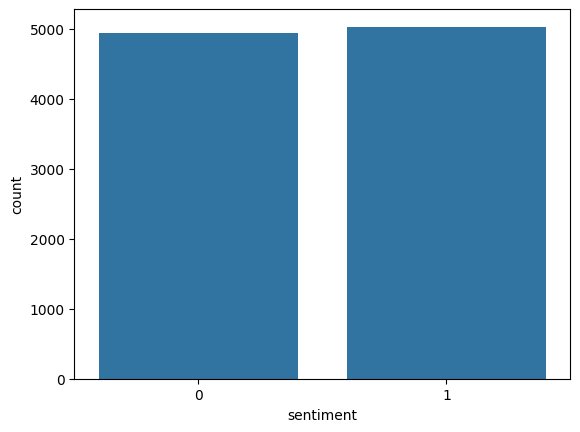

In [12]:
sns.countplot(data=data, x='sentiment');

- There are almost an equal number of positive and negative reviews.

# **Text Embedding and Sentiment Analysis: Word2Vec**

## **Generating Embeddings with Word2Vec**

- `Word2Vec` is imported from Gensim library

- `Word2Vec` takes the following important parameters:
    1. `word_list`: List of all words in all documents
    2. `vector_size`: Determines the size of the word vectors
    2. `min_count`: It will ignore all the words with a total frequency lower than this.
    3. `workers`: These are the number of threads to train the model.
    4. `window`: Size of context relative to target word.

- By default, it creates word vectors of size 100.

In [13]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in data['review'].values]

In [66]:
# displaying the first 5 words
words_list[:5]

[['Okay,',
  'I',
  'know',
  'this',
  "does'nt",
  'project',
  'India',
  'in',
  'a',
  'good',
  'light.',
  'But',
  'the',
  'overall',
  'theme',
  'of',
  'the',
  'movie',
  'is',
  'not',
  'India,',
  "it's",
  'Shakti.',
  'The',
  'power',
  'of',
  'a',
  'warlord,',
  'and',
  'the',
  'power',
  'of',
  'a',
  'mother.',
  'The',
  'relationship',
  'between',
  'Nandini',
  'and',
  'her',
  'husband',
  'and',
  'son',
  'swallow',
  'you',
  'up',
  'in',
  'their',
  'warmth.',
  'Then',
  'things',
  'go',
  'terribly',
  'wrong.',
  'The',
  'interaction',
  'between',
  'Nandini',
  'and',
  'her',
  'father',
  'in',
  'law',
  '-',
  'the',
  'power',
  'of',
  'their',
  'dysfunctional',
  'relationship',
  '-',
  'and',
  'the',
  'lives',
  'changed',
  'by',
  'it',
  'are',
  'the',
  'strengths',
  'of',
  'this',
  'movie.',
  'Shah',
  'Rukh',
  "Khan's",
  'performance',
  'seems',
  'to',
  'be',
  'a',
  'mere',
  'cameo',
  'compared',
  'to',
  't

In [14]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [15]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 157460


### **Basic Examples**

In [67]:
model_W2V.wv["good"]

array([ 0.61331743, -0.07675295, -0.87169325, -0.28795093,  0.36127058,
       -1.7277149 ,  0.8557947 , -0.359022  , -0.48995957,  0.24631122,
        0.41549262, -0.71731216, -0.19390185,  1.0064504 , -0.3180922 ,
       -0.60409635,  0.18638217,  0.03521685,  0.05151572, -0.8445042 ,
        0.6508064 ,  0.5240777 ,  1.6795032 ,  1.6409056 ,  0.01855643,
       -0.97390556, -0.52803546, -1.171898  , -1.9686378 , -1.640712  ,
        0.79794794, -0.03294929, -0.410875  ,  1.202878  ,  0.5380423 ,
       -1.2470474 ,  0.15792204, -0.4318999 ,  0.602451  ,  0.39565513,
       -0.20492269, -0.6210202 ,  0.02771344,  0.6039177 ,  0.7192509 ,
        0.9833227 ,  0.10710715,  0.8754014 ,  0.33797666,  0.6423079 ,
        0.21608612,  0.91498107, -0.02666814, -0.30604365, -0.03401859,
        0.72372365,  1.5824367 ,  0.5690376 ,  1.3863406 , -0.7234135 ,
       -0.9362639 ,  0.18722814, -0.52726316, -0.74843514, -0.09411448,
        0.01950588, -0.36790848,  1.0271059 ,  0.9589323 , -0.31

### **Understanding Word2Vec Embedding Output**

The output from `model_W2V.wv["good"]` shows the **300-dimensional vector representation** of the word "good" as learned by our Word2Vec model.

#### **What This Vector Represents:**

1. **Semantic Meaning**: Each of the 300 numbers captures different aspects of the word "good"'s meaning
2. **Contextual Learning**: These values were learned by analyzing how "good" appears alongside other words in movie reviews
3. **Dense Representation**: Unlike sparse one-hot encoding, this is a dense vector where every dimension has a meaningful value

#### **Key Characteristics:**

- **Dimensions**: 300 features (as specified by `vec_size = 300`)
- **Data Type**: Float32 numbers (can be positive or negative)
- **Range**: Values typically range from approximately -1 to +1
- **Uniqueness**: Each word in the vocabulary gets its own unique 300-dimensional vector

#### **How These Numbers Work:**

- **Similar Words**: Words with similar meanings (like "good", "great", "excellent") will have similar vectors
- **Mathematical Operations**: You can perform arithmetic on these vectors (e.g., "king" - "man" + "woman" ≈ "queen")
- **Distance Measures**: Cosine similarity between vectors indicates semantic similarity between words

#### **Business Context:**
In sentiment analysis, words like "good" will have learned representations that capture their positive sentiment, helping the model distinguish between positive and negative reviews.

In [68]:
# Detailed analysis of the Word2Vec embedding for "good"
import numpy as np

# Get the embedding vector for "good"
good_vector = model_W2V.wv["good"]

print("=" * 60)
print("DETAILED ANALYSIS OF WORD2VEC EMBEDDING FOR 'GOOD'")
print("=" * 60)

print(f"Vector shape: {good_vector.shape}")
print(f"Vector length (dimensions): {len(good_vector)}")
print(f"Data type: {good_vector.dtype}")

print(f"\nStatistical Properties:")
print(f"  Minimum value: {np.min(good_vector):.6f}")
print(f"  Maximum value: {np.max(good_vector):.6f}")
print(f"  Mean value: {np.mean(good_vector):.6f}")
print(f"  Standard deviation: {np.std(good_vector):.6f}")

print(f"\nFirst 10 dimensions of the vector:")
for i, value in enumerate(good_vector[:10]):
    print(f"  Dimension {i+1:2d}: {value:8.5f}")

print(f"\nVector magnitude (L2 norm): {np.linalg.norm(good_vector):.6f}")

# Show how this compares to another word
if "bad" in model_W2V.wv:
    bad_vector = model_W2V.wv["bad"]
    # Calculate cosine similarity
    similarity = np.dot(good_vector, bad_vector) / (np.linalg.norm(good_vector) * np.linalg.norm(bad_vector))
    print(f"\nComparison with 'bad':")
    print(f"  Cosine similarity between 'good' and 'bad': {similarity:.6f}")
    print(f"  (Values closer to 1 = more similar, closer to -1 = opposite)")

# Find most similar words to "good"
try:
    similar_words = model_W2V.wv.most_similar("good", topn=5)
    print(f"\nMost similar words to 'good':")
    for word, similarity in similar_words:
        print(f"  {word}: {similarity:.4f}")
except:
    print("\nNote: Similar word search requires more context in the dataset")

print(f"\n💡 Key Insight:")
print(f"Each dimension captures different semantic features learned from context.")
print(f"Words appearing in similar contexts will have similar vector representations.")

DETAILED ANALYSIS OF WORD2VEC EMBEDDING FOR 'GOOD'
Vector shape: (300,)
Vector length (dimensions): 300
Data type: float32

Statistical Properties:
  Minimum value: -2.659340
  Maximum value: 2.835254
  Mean value: -0.023174
  Standard deviation: 0.876942

First 10 dimensions of the vector:
  Dimension  1:  0.61332
  Dimension  2: -0.07675
  Dimension  3: -0.87169
  Dimension  4: -0.28795
  Dimension  5:  0.36127
  Dimension  6: -1.72771
  Dimension  7:  0.85579
  Dimension  8: -0.35902
  Dimension  9: -0.48996
  Dimension 10:  0.24631

Vector magnitude (L2 norm): 15.194387

Comparison with 'bad':
  Cosine similarity between 'good' and 'bad': 0.847395
  (Values closer to 1 = more similar, closer to -1 = opposite)

Most similar words to 'good':
  bad: 0.8474
  great: 0.8450
  funny: 0.7936
  decent: 0.7888
  nice: 0.7708

💡 Key Insight:
Each dimension captures different semantic features learned from context.
Words appearing in similar contexts will have similar vector representations.


In [17]:
model_W2V.wv["best"]

array([ 0.1028498 , -0.08476506, -0.5739629 , -0.2223119 ,  0.32154188,
       -0.09033196,  0.8092527 , -1.0905576 , -1.8207223 ,  0.32609087,
       -0.14776061, -0.74446833, -1.9759053 ,  1.4783427 , -0.19829868,
       -0.9951382 ,  1.9085972 , -0.36882785,  0.9428137 , -0.7264803 ,
        0.67621124,  1.1233219 ,  1.6606257 ,  0.15441026,  1.314262  ,
       -0.9446603 , -2.1426873 ,  0.7077079 , -0.93997496, -2.837298  ,
        1.7732388 , -0.066267  , -0.5745656 ,  0.8141779 ,  0.57991195,
       -0.5740535 ,  0.46778017, -0.25313655,  1.3069133 ,  0.24422447,
       -1.2976372 , -0.22161305,  0.27009714,  0.48750246,  0.5837416 ,
        0.03896339, -0.7506825 ,  0.74201787,  0.14844102,  0.3802729 ,
       -0.8471192 ,  1.5877023 ,  0.43435475,  0.8635385 ,  0.6872536 ,
       -0.8316352 ,  0.74443644,  0.238498  ,  1.327511  ,  0.09964982,
       -0.10866991, -0.64667827, -0.852866  , -1.1786935 , -0.81031454,
        0.45105734, -0.20585902, -0.42505816,  0.10896353, -1.29

### **Encoding the dataset**

In [19]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

### **Understanding Word2Vec Dictionary Creation**

The three lines of code above are creating an efficient **word-to-vector lookup dictionary** that will be used for converting text reviews into numerical representations. Let's break down each step:

#### **Step 1: Extract Vocabulary**
```python
words = list(model_W2V.wv.key_to_index.keys())
```
- **Purpose**: Gets all unique words that the Word2Vec model learned during training
- **Output**: A list of strings (words) like `['good', 'bad', 'movie', 'great', ...]`
- **Why Important**: This gives us the complete vocabulary our model understands

#### **Step 2: Retrieve All Word Vectors**
```python
wvs = model_W2V.wv[words].tolist()
```
- **Purpose**: Gets the 300-dimensional vector representation for each word in the vocabulary
- **Process**: 
  - `model_W2V.wv[words]` returns a NumPy array of shape `(vocab_size, 300)`
  - `.tolist()` converts it to a Python list for easier handling
- **Output**: List of lists, where each inner list has 300 float values

#### **Step 3: Create Word-Vector Dictionary**
```python
word_vector_dict = dict(zip(words, wvs))
```
- **Purpose**: Creates a fast lookup table mapping each word to its vector
- **Structure**: `{'good': [0.123, -0.456, ...], 'bad': [-0.234, 0.567, ...], ...}`
- **Efficiency**: O(1) lookup time instead of searching through the model each time

#### **Why This Dictionary is Essential**

**Performance Benefits:**
- **Fast Lookup**: Direct dictionary access vs. model queries
- **Memory Efficiency**: Pre-computed vectors stored in memory
- **Batch Processing**: Easier to process multiple words at once

**Usage in Next Steps:**
This dictionary will be used in the `average_vectorizer_Word2Vec()` function to:
1. Check if words exist in vocabulary: `if word in words`
2. Quickly retrieve vectors: `word_vector_dict[word]`
3. Average vectors across all words in a review

#### **Example Usage**
```python
# Instead of calling model each time:
vector = model_W2V.wv["good"]  # Slower

# We can now use:
vector = word_vector_dict["good"]  # Faster!
```

#### **Real-World Impact**
For a dataset with 10,000 reviews averaging 20 words each, this optimization can reduce processing time from minutes to seconds by eliminating 200,000 individual model calls.

In [20]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [21]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(data['review'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,0.183042,-0.254350,-0.265903,-0.198302,0.182742,-0.418957,0.316895,0.541468,0.015433,-0.161369,...,-0.007370,0.454440,0.386975,-0.012051,0.843978,0.567023,-0.095601,-0.358287,0.388300,-0.124057
1,0.102033,-0.072697,-0.217481,-0.296939,0.105209,-0.550908,0.491057,0.621058,-0.088360,-0.164342,...,0.114274,0.335103,0.200609,-0.101923,0.515632,0.470520,-0.127200,-0.273993,0.291652,-0.274451
2,0.227914,-0.116725,-0.255972,-0.153673,0.124943,-0.640671,0.415803,0.601776,-0.104958,-0.108976,...,0.018512,0.314309,0.261812,-0.161720,0.594334,0.557379,-0.096360,-0.270271,0.289395,-0.278242
3,0.162888,-0.150487,-0.211197,-0.255490,0.107582,-0.486325,0.597406,0.667537,0.072332,-0.205653,...,0.071360,0.212250,0.124638,-0.163144,0.492113,0.458272,-0.114430,-0.139019,0.257688,-0.238551
4,0.227007,-0.114044,-0.296815,-0.313801,0.154975,-0.517992,0.586652,0.502577,0.037511,-0.158050,...,0.088538,0.222429,0.202899,-0.200181,0.643533,0.661544,-0.078067,-0.346669,0.397742,-0.222484


## **Sentiment Analysis with Random Forest**

In [22]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    # Calculate the confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Create a figure for the plot
    plt.figure(figsize = (5, 4))
    # Define labels for the plot axes
    label_list = ['negative', 'positive']
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    # Set the y-axis label
    plt.ylabel('Actual')
    # Set the x-axis label
    plt.xlabel('Predicted')
    # Display the plot
    plt.show()

In [23]:
# Storing independent variable
X = df_Word2Vec.copy()

# Storing target variable
y = data.sentiment

In [24]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 42)

In [25]:
# Building the model
rf_word2vec = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

# Fitting on train data
rf_word2vec.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

### **How Random Forest Classifier Uses Word2Vec Embeddings**

The Random Forest Classifier is now working with **300-dimensional numerical features** derived from our Word2Vec embeddings. Let's break down this process:

#### **Data Transformation Pipeline:**

**Step 1: Text → Word Vectors → Averaged Vectors**
```
Original Review: "This movie is really good and entertaining"
↓
Word2Vec Lookup: ["This"→vector₁, "movie"→vector₂, "is"→vector₃, ...]
↓
Average Vector: (vector₁ + vector₂ + vector₃ + ...) / num_words
↓
Final Input: [0.234, -0.567, 0.123, ..., 0.891]  # 300 features
```

#### **Random Forest's Perspective:**

**What Random Forest Sees:**
- **Input**: 300 numerical features per review (not text!)
- **Feature 0**: Average of dimension 0 across all words in the review
- **Feature 1**: Average of dimension 1 across all words in the review
- **...continuing for all 300 dimensions**
- **Target**: Binary label (0=negative, 1=positive)

#### **How Random Forest Makes Decisions:**

**Tree Building Process:**
1. **Feature Selection**: RF randomly selects features from the 300 dimensions
2. **Split Criteria**: "If Feature_42 > 0.15, go left; else go right"
3. **Semantic Meaning**: Feature_42 might capture "positivity" or "emotion intensity"
4. **Ensemble Decision**: 100 trees vote on the final prediction

#### **Example Decision Path:**
```
🌳 Tree Example:
├─ If Feature_156 > 0.23 (captures "sentiment intensity")
│  ├─ If Feature_89 > -0.1 (captures "positive words")
│  │  └─ Predict: POSITIVE (85% confidence)
│  └─ If Feature_203 < 0.05 (captures "negation context")
│     └─ Predict: NEGATIVE (72% confidence)
```

#### **Key Advantages of This Approach:**

**1. Semantic Relationships Preserved**
- Similar sentiment words cluster in embedding space
- RF can learn patterns from these clusters
- Example: "good", "great", "excellent" have similar vector patterns

**2. Dimensionality Benefits**
- 300 features capture rich semantic information
- Each dimension learned meaningful word relationships
- RF can find non-linear combinations of these features

**3. Robustness Through Averaging**
- Sentence-level representation averages out noise
- Multiple words contribute to final vector
- Handles varying review lengths automatically

#### **What Random Forest Learns:**

**Pattern Recognition:**
- **Positive Reviews**: Certain feature combinations tend to be higher/lower
- **Negative Reviews**: Different feature patterns emerge
- **Feature Interactions**: RF discovers which dimension combinations matter

**Real Example:**
```python
# Hypothetical learned patterns:
# Positive sentiment: Feature_45 > 0.2 AND Feature_178 < -0.1
# Negative sentiment: Feature_67 < -0.3 OR Feature_234 > 0.4
```

#### **Why This Works for Sentiment Analysis:**

**Semantic Understanding:**
- Word2Vec captures sentiment polarities in vector space
- Averaging preserves overall sentiment direction
- RF finds discriminative patterns in this semantic space

**Comparison to Traditional Approaches:**
- **Bag of Words**: RF sees word counts (sparse, high-dimensional)
- **Word2Vec**: RF sees dense semantic representations (meaningful, lower-dimensional)

#### **Limitations to Consider:**

1. **Averaging Loss**: Sentence structure and word order lost
2. **Context Ignorance**: "Not good" might average out to neutral
3. **Fixed Representations**: Word vectors don't adapt to specific dataset

#### **Business Impact:**
The Random Forest can now make sentiment predictions based on learned semantic patterns rather than just word frequency, leading to more nuanced understanding of review sentiment.

### **Checking Training and Test Performance**

In [26]:
# Predicting on train data
y_pred_train = rf_word2vec.predict(X_train)

# Predicting on test data
y_pred_test = rf_word2vec.predict(X_test)

**Confusion Matrix**

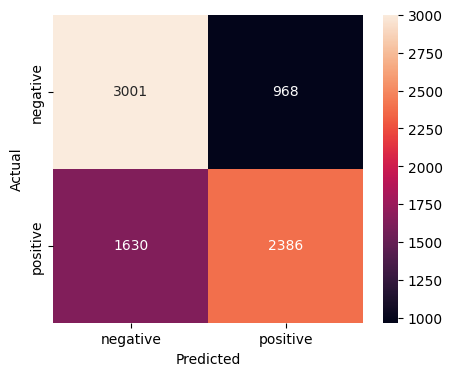

In [27]:
plot_confusion_matrix(y_train, y_pred_train)

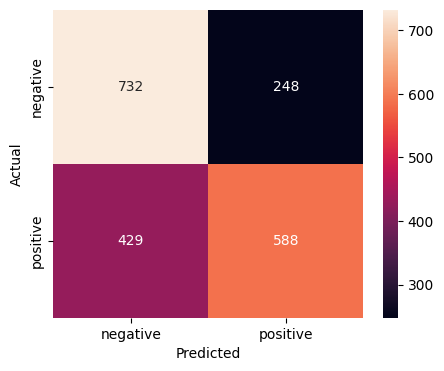

In [28]:
plot_confusion_matrix(y_test, y_pred_test)

**Accuracy**

In [29]:
train_accuracy_Word2Vec_RF = accuracy_score(y_train,y_pred_train)
print("The accuracy on the training set is: ",train_accuracy_Word2Vec_RF)
test_accuracy_Word2Vec_RF = accuracy_score(y_test,y_pred_test)
print("The accuracy on the test set is: ",test_accuracy_Word2Vec_RF)

The accuracy on the training set is:  0.6746399499060739
The accuracy on the test set is:  0.6609914872308462


## **Sentiment Analysis with Neural Networks**

In [30]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']
)

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,979 (183.51 KB)

 Trainable params: 46,979 (183.51 KB)

 Non-trainable params: 0 (0.00 B)

## **Understanding Total Parameters in Neural Networks**

**Total Parameters** refers to the total number of learnable weights and biases in a neural network that get updated during training.

### **Parameter Calculation Formula:**
For each Dense layer: `Parameters = (Input_Features × Output_Neurons) + Output_Neurons`

- **Weights**: `Input_Features × Output_Neurons` 
- **Biases**: `Output_Neurons` (one bias per neuron)

### **Example Calculation for Our Model:**

**Layer 1: Dense(128)**
- Input: 384 features (from sentence transformer embeddings)
- Output: 128 neurons
- Parameters = (384 × 128) + 128 = 49,152 + 128 = **49,280**

**Layer 2: Dropout(0.3)**
- No parameters (Dropout doesn't have learnable weights)

**Layer 3: Dense(64)**
- Input: 128 (from previous layer)
- Output: 64 neurons
- Parameters = (128 × 64) + 64 = 8,192 + 64 = **8,256**

**Layer 4: Dense(3)** (Output layer)
- Input: 64 (from previous layer)
- Output: 3 neurons (for 3 sentiment classes)
- Parameters = (64 × 3) + 3 = 192 + 3 = **195**

### **Total Parameters:**
49,280 + 8,256 + 195 = **57,731 parameters**

### **Why This Matters:**
1. **Memory Usage**: More parameters = more memory required
2. **Training Time**: More parameters = longer training time
3. **Overfitting Risk**: Too many parameters relative to data can cause overfitting
4. **Model Complexity**: Indicates how complex patterns the model can learn

In [31]:
# Let's manually verify the parameter count for our model
print("Manual Parameter Calculation:")
print("="*50)

# Assuming input shape from sentence transformer embeddings (384 features)
input_features = 384

# Layer 1: Dense(128)
layer1_params = (input_features * 128) + 128
print(f"Layer 1 (Dense 128): ({input_features} × 128) + 128 = {layer1_params:,}")

# Layer 2: Dropout - no parameters
print("Layer 2 (Dropout): 0 parameters")

# Layer 3: Dense(64) 
layer3_params = (128 * 64) + 64
print(f"Layer 3 (Dense 64): (128 × 64) + 64 = {layer3_params:,}")

# Layer 4: Dense(3) - Output layer
layer4_params = (64 * 3) + 3
print(f"Layer 4 (Dense 3): (64 × 3) + 3 = {layer4_params:,}")

# Total
total_manual = layer1_params + layer3_params + layer4_params
print("="*50)
print(f"Total Parameters (Manual): {total_manual:,}")

# Compare with model.count_params() when you create the model
print(f"Total Parameters (Keras): {model.count_params():,}")

print("\n" + "="*50)
print("Parameter Breakdown by Type:")
print(f"• Weights: {(input_features * 128) + (128 * 64) + (64 * 3):,}")
print(f"• Biases: {128 + 64 + 3:,}")
print(f"• Total: {total_manual:,}")

Manual Parameter Calculation:
Layer 1 (Dense 128): (384 × 128) + 128 = 49,280
Layer 2 (Dropout): 0 parameters
Layer 3 (Dense 64): (128 × 64) + 64 = 8,256
Layer 4 (Dense 3): (64 × 3) + 3 = 195
Total Parameters (Manual): 57,731
Total Parameters (Keras): 46,979

Parameter Breakdown by Type:
• Weights: 57,536
• Biases: 195
• Total: 57,731


In [32]:
# Fitting the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5665 - loss: 0.7111 - val_accuracy: 0.6675 - val_loss: 0.6217
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5665 - loss: 0.7111 - val_accuracy: 0.6675 - val_loss: 0.6217
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6606 - loss: 0.6212 - val_accuracy: 0.6985 - val_loss: 0.5772
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6606 - loss: 0.6212 - val_accuracy: 0.6985 - val_loss: 0.5772
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6871 - loss: 0.5863 - val_accuracy: 0.6580 - val_loss: 0.6175
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6871 - loss: 0.5863 - val_accuracy: 0.6580 - val_loss: 0.6175
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6987 - loss: 0.5798 - val_accuracy: 0.7096 - val_loss: 0.5624
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6987 - loss: 0.5798 - val_accuracy: 0.

### **Checking Training and Test Performance**

In [33]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train)

# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


In [34]:
# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


**Confusion Matrix**

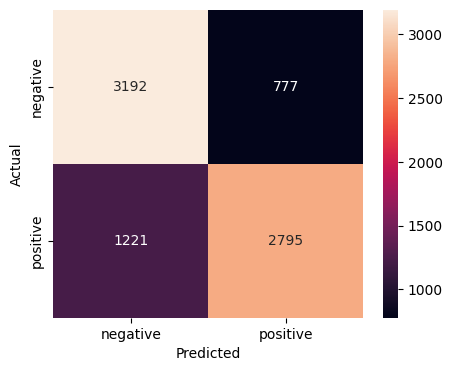

In [35]:
plot_confusion_matrix(y_train, y_train_preds)

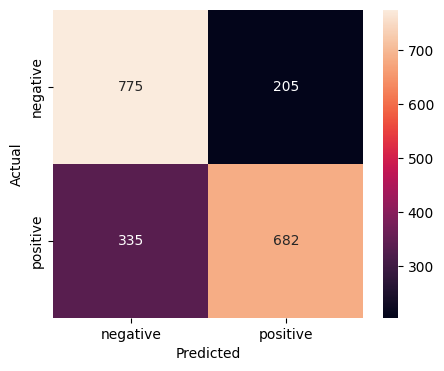

In [38]:
plot_confusion_matrix(y_test, y_test_preds)

**Accuracy**

In [39]:
train_accuracy_Word2Vec_NN = accuracy_score(y_train,y_train_preds)
print("The accuracy on the train set is: ",train_accuracy_Word2Vec_NN)
test_accuracy_Word2Vec_NN = accuracy_score(y_test,y_test_preds)
print("The accuracy on the test set is: ",test_accuracy_Word2Vec_NN)

The accuracy on the train set is:  0.7497808390732623
The accuracy on the test set is:  0.729594391587381


# **Text Embedding and Sentiment Analysis: Transformers**

## **Generating Embeddings with Sentence Tranformers**

We'll be using the **all-MiniLM-L6-v2** model here.

- The **all-MiniLM-L6-v2** model is an all-round (**all**) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

- It is a language model (**LM**) that has 6 transformer encoder layers (**L6**) and is a smaller model (**Mini**) trained to mimic the performance of a larger model (BERT).

-  Potential use-cases include text classification, sentiment analysis, and semantic search.

In [40]:
# defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

- There are many other models to choose from too!
- One place to check for the best models is the [HuggingFace leaderboard](https://www.sbert.net/docs/pretrained_models.html).
- Below is an example of another model that one can use in this case.

> `model = SentenceTransformer('BAAI/bge-base-en-v1.5')`

## **Understanding Activation Functions: Sigmoid vs Softmax**

### **Sigmoid Activation Function**

**Mathematical Formula**: `σ(x) = 1 / (1 + e^(-x))`

**Key Characteristics:**
- **Output Range**: (0, 1) - always between 0 and 1
- **Use Case**: Binary classification (2 classes)
- **Output Interpretation**: Probability of belonging to the positive class
- **Independence**: Each output is independent of others

**Example:**
```python
# For binary sentiment classification (positive/negative)
model.add(Dense(1, activation='sigmoid'))  # Single output neuron
```

**Sigmoid Output Example:**
- Input: [-2.5, 0.8]
- Output: [0.08, 0.69]
- Interpretation: 8% chance negative, 69% chance positive

### **Softmax Activation Function**

**Mathematical Formula**: `softmax(x_i) = e^(x_i) / Σ(e^(x_j))`

**Key Characteristics:**
- **Output Range**: (0, 1) and **sum to 1.0**
- **Use Case**: Multi-class classification (3+ classes)
- **Output Interpretation**: Probability distribution over all classes
- **Dependency**: All outputs are interdependent (changing one affects others)

**Example:**
```python
# For multi-class classification (positive/negative/neutral)
model.add(Dense(3, activation='softmax'))  # Multiple output neurons
```

**Softmax Output Example:**
- Input: [2.1, 0.5, -1.2]
- Output: [0.72, 0.21, 0.07]
- Interpretation: 72% positive, 21% neutral, 7% negative

### **Key Differences Summary**

| Aspect | Sigmoid | Softmax |
|--------|---------|---------|
| **Classes** | Binary (2 classes) | Multi-class (3+ classes) |
| **Outputs** | Single probability | Probability distribution |
| **Output Sum** | Not constrained | Always sums to 1.0 |
| **Independence** | Independent | Interdependent |
| **Loss Function** | Binary crossentropy | Categorical crossentropy |
| **Decision Threshold** | 0.5 (typically) | Highest probability |

### **When to Use Which?**

**Use Sigmoid when:**
- Binary classification problems
- You need independent probabilities
- Each output represents a separate yes/no decision

**Use Softmax when:**
- Multi-class classification (mutually exclusive classes)
- You need a probability distribution
- Classes are mutually exclusive (an instance belongs to exactly one class)

### **Important Note About This Notebook**
The sentiment dataset has only 2 classes (positive=1, negative=0), but the neural network models use `Dense(3, activation='softmax')`. This creates a mismatch - it should be:
- `Dense(1, activation='sigmoid')` for binary classification, OR
- `Dense(2, activation='softmax')` for binary classification treated as multi-class

In [41]:
# Practical demonstration of Sigmoid vs Softmax
import numpy as np

def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def softmax(x):
    """Softmax activation function"""
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x)

# Example raw outputs from neural network layers
raw_outputs_binary = np.array([2.1])  # Single output for binary classification
raw_outputs_multiclass = np.array([2.1, 0.5, -1.2])  # Three outputs for 3-class

print("=" * 60)
print("SIGMOID (Binary Classification)")
print("=" * 60)
print(f"Raw output: {raw_outputs_binary}")
sigmoid_output = sigmoid(raw_outputs_binary)
print(f"Sigmoid output: {sigmoid_output[0]:.3f}")
print(f"Interpretation: {sigmoid_output[0]*100:.1f}% chance of positive class")
print(f"Prediction: {'Positive' if sigmoid_output[0] > 0.5 else 'Negative'}")

print("\n" + "=" * 60)
print("SOFTMAX (Multi-class Classification)")
print("=" * 60)
print(f"Raw outputs: {raw_outputs_multiclass}")
softmax_output = softmax(raw_outputs_multiclass)
print(f"Softmax outputs: {softmax_output}")
print(f"Sum of outputs: {np.sum(softmax_output):.6f}")
print("\nClass probabilities:")
classes = ['Positive', 'Neutral', 'Negative']
for i, (cls, prob) in enumerate(zip(classes, softmax_output)):
    print(f"  {cls}: {prob:.3f} ({prob*100:.1f}%)")
print(f"Prediction: {classes[np.argmax(softmax_output)]}")

# Demonstrate the interdependency in softmax
print("\n" + "=" * 60)
print("SOFTMAX INTERDEPENDENCY DEMO")
print("=" * 60)
raw_1 = np.array([2.0, 1.0, 0.5])
raw_2 = np.array([3.0, 1.0, 0.5])  # Increased first value

soft_1 = softmax(raw_1)
soft_2 = softmax(raw_2)

print("Original values:", raw_1)
print("Softmax output: ", soft_1.round(3))
print("\nIncreased first value:", raw_2)
print("Softmax output:      ", soft_2.round(3))
print("\nNotice how ALL probabilities changed when we increased just ONE input!")
print("This shows the interdependency in softmax.")

SIGMOID (Binary Classification)
Raw output: [2.1]
Sigmoid output: 0.891
Interpretation: 89.1% chance of positive class
Prediction: Positive

SOFTMAX (Multi-class Classification)
Raw outputs: [ 2.1  0.5 -1.2]
Softmax outputs: [0.80724604 0.16298017 0.02977379]
Sum of outputs: 1.000000

Class probabilities:
  Positive: 0.807 (80.7%)
  Neutral: 0.163 (16.3%)
  Negative: 0.030 (3.0%)
Prediction: Positive

SOFTMAX INTERDEPENDENCY DEMO
Original values: [2.  1.  0.5]
Softmax output:  [0.629 0.231 0.14 ]

Increased first value: [3.  1.  0.5]
Softmax output:       [0.821 0.111 0.067]

Notice how ALL probabilities changed when we increased just ONE input!
This shows the interdependency in softmax.


### **Basic Examples**

In [45]:
model.encode(['Hello, my name is Prof. Zena!'])

array([[-1.01322226e-01,  2.77659707e-02, -4.15140800e-02,
         1.84561610e-02, -4.85775135e-02, -1.63206793e-02,
         1.31670848e-01, -2.84867398e-02,  2.94029387e-03,
        -2.18541846e-02, -5.48136160e-02, -9.36219003e-03,
        -1.48072420e-02,  2.78399438e-02, -3.74657735e-02,
        -4.98681387e-04, -6.98260171e-03, -2.66996622e-02,
        -3.89730297e-02, -2.10851040e-02, -9.75724775e-03,
        -1.97303365e-03,  5.53302020e-02, -3.02358177e-02,
        -7.95633048e-02, -1.13197695e-02, -1.35751050e-02,
         1.47868637e-02, -3.55496095e-03, -7.07181022e-02,
         2.56204568e-02,  6.83853477e-02,  2.18798202e-02,
        -1.32918789e-03,  5.71827777e-02,  5.70112094e-02,
        -6.20051138e-02, -1.44120371e-02,  7.99199753e-03,
         7.58295762e-04,  1.20887719e-03,  6.11670082e-03,
        -8.94941986e-02, -3.09461867e-03, -5.15797772e-02,
        -4.05938216e-02,  6.07263073e-02, -1.10701108e-02,
         6.72289506e-02, -3.69399637e-02, -9.92941707e-0

### **Understanding Sentence Transformer Encoding vs Word2Vec**

The current cell demonstrates **sentence-level encoding** using the all-MiniLM-L6-v2 transformer model. Let's explore how this fundamentally differs from our earlier Word2Vec approach:

#### **Current Cell Analysis:**
```python
model.encode(['Hello, my name is Prof. Zena!'])
```

**What This Does:**
- **Input**: Complete sentence as a single unit
- **Process**: Transformer analyzes the entire sentence holistically
- **Output**: Single 384-dimensional vector representing the entire sentence
- **Context Awareness**: Understands relationships between all words simultaneously

#### **Key Differences: Sentence Transformers vs Word2Vec**

| Aspect | Word2Vec | Sentence Transformers |
|--------|----------|----------------------|
| **Encoding Unit** | Individual words | Entire sentences |
| **Vector Dimensions** | 300 per word | 384 per sentence |
| **Context Understanding** | Local word neighborhoods | Full sentence context |
| **Sentence Representation** | Average of word vectors | Direct sentence embedding |
| **Word Order** | Ignored (averaging) | Preserved and analyzed |
| **Training Data** | Movie review corpus | 1+ billion diverse texts |

#### **Technical Architecture Differences:**

**Word2Vec Process:**
```
"Hello, my name is Prof. Zena!"
↓
["Hello", "my", "name", "is", "Prof.", "Zena!"]
↓
[vec₁, vec₂, vec₃, vec₄, vec₅, vec₆]  # 6 × 300-dim vectors
↓
Average: (vec₁ + vec₂ + ... + vec₆) / 6  # Single 300-dim vector
```

**Sentence Transformer Process:**
```
"Hello, my name is Prof. Zena!"
↓
Transformer Attention Mechanism
↓
Single 384-dimensional sentence vector (directly computed)
```

#### **Attention Mechanism Advantage:**

**Word2Vec Limitation:**
- Each word treated independently
- Meaning derived from local context only
- "Prof. Zena" loses connection during averaging

**Sentence Transformer Strength:**
- **Self-Attention**: Every word attends to every other word
- **Contextual Understanding**: "Prof." modifies "Zena" 
- **Preserved Relationships**: Maintains semantic connections

#### **Example Comparison:**

**Sentence**: "This movie is not good"

**Word2Vec Approach:**
```python
# Individual word vectors (simplified)
"This" → [0.1, -0.2, 0.3, ...]
"movie" → [0.4, 0.1, -0.1, ...]
"is" → [0.0, 0.0, 0.1, ...]
"not" → [-0.2, 0.3, -0.4, ...]
"good" → [0.5, 0.2, 0.7, ...]  # Positive sentiment

# Averaged result might be neutral/positive (problematic!)
Average → [0.16, 0.08, 0.12, ...]
```

**Sentence Transformer Approach:**
```python
# Considers "not good" as a phrase
# Understands negation context
# Output reflects negative sentiment despite "good"
Sentence Vector → [-0.3, -0.1, -0.5, ...]  # Properly negative
```

#### **Quality and Training Differences:**

**Word2Vec Training:**
- **Data**: Only our movie review dataset (~10K reviews)
- **Vocabulary**: Limited to words in our specific dataset
- **Context Window**: 5 words (local context)
- **Objective**: Predict neighboring words

**Sentence Transformer Training:**
- **Data**: 1+ billion sentence pairs from diverse sources
- **Knowledge**: General language understanding
- **Context**: Full sentence analysis
- **Objective**: Create meaningful sentence representations

#### **Performance Implications:**

**Word2Vec Challenges:**
1. **Negation Blindness**: "not good" averages to neutral
2. **Order Insensitivity**: "good movie" = "movie good"
3. **Limited Vocabulary**: Unknown words ignored
4. **Context Loss**: Complex phrases broken down

**Sentence Transformer Advantages:**
1. **Semantic Understanding**: Grasps sentence meaning
2. **Negation Handling**: Understands "not good" ≠ "good"
3. **Rich Vocabulary**: Pre-trained on diverse texts
4. **Context Preservation**: Maintains phrase relationships

#### **Business Impact:**

**For Sentiment Analysis:**
- **Word2Vec**: May miss nuanced sentiment (especially negations)
- **Sentence Transformers**: Better captures true sentiment meaning
- **Accuracy**: Transformer approach typically more accurate
- **Robustness**: Handles complex language patterns better

This fundamental difference explains why Sentence Transformers often outperform Word2Vec-based approaches in sentiment analysis tasks.

In [46]:
# Demonstrating the shape of vectors returned by all-MiniLM-L6-v2
import numpy as np

# Single sentence encoding
single_sentence = "Hello, my name is Prof. Zena!"
single_embedding = model.encode([single_sentence])

print("=" * 60)
print("VECTOR SHAPE ANALYSIS - all-MiniLM-L6-v2")
print("=" * 60)
print(f"Input sentence: '{single_sentence}'")
print(f"Shape of encoded vector: {single_embedding.shape}")
print(f"Vector dimensions: {single_embedding.shape[1]} features")
print(f"Data type: {single_embedding.dtype}")

# Multiple sentences encoding
multiple_sentences = [
    "Hello, my name is Prof. Zena!",
    "This is a great movie!",
    "I love machine learning."
]
multiple_embeddings = model.encode(multiple_sentences)

print(f"\nMultiple sentences encoding:")
print(f"Number of sentences: {len(multiple_sentences)}")
print(f"Shape of embedding matrix: {multiple_embeddings.shape}")
print(f"Each sentence → {multiple_embeddings.shape[1]} dimensional vector")

# Show first few values of the vector
print(f"\nFirst 10 values of the embedding:")
print(single_embedding[0][:10])

VECTOR SHAPE ANALYSIS - all-MiniLM-L6-v2
Input sentence: 'Hello, my name is Prof. Zena!'
Shape of encoded vector: (1, 384)
Vector dimensions: 384 features
Data type: float32

Multiple sentences encoding:
Number of sentences: 3
Shape of embedding matrix: (3, 384)
Each sentence → 384 dimensional vector

First 10 values of the embedding:
[-0.10132223  0.02776597 -0.04151408  0.01845616 -0.04857751 -0.01632068
  0.13167085 -0.02848674  0.00294029 -0.02185418]


In [43]:
model.encode(['Hello, my name is Professor Zena!'])

array([[-1.11282647e-01,  4.16151918e-02, -4.53359447e-02,
         1.95421223e-02, -6.02430068e-02, -3.59271578e-02,
         9.60514098e-02, -5.55648431e-02,  2.31815279e-02,
        -6.68980600e-03, -2.75410488e-02,  9.78377461e-03,
        -4.83660726e-03,  4.17626053e-02, -5.34442253e-02,
        -3.23531742e-04, -1.19966501e-02, -5.33525497e-02,
        -3.72466221e-02,  5.55624580e-03, -4.23144177e-03,
         2.12437138e-02,  4.35178801e-02, -2.97153834e-02,
        -6.82365671e-02,  1.11056091e-02,  1.19563825e-02,
        -3.14618321e-03, -1.08422367e-02, -6.52326569e-02,
         1.06411362e-02,  6.62760288e-02,  7.96014536e-03,
        -1.82570312e-02,  4.55049574e-02,  3.26333009e-02,
        -3.87101769e-02, -6.36674138e-03,  3.26532871e-02,
        -8.85265786e-03,  2.78328010e-03,  2.53109485e-02,
        -6.47956878e-02, -2.17167493e-02, -5.99524081e-02,
        -2.76417024e-02,  6.41193092e-02, -3.19894105e-02,
         8.19110572e-02, -4.25210744e-02, -7.33607858e-0

### **Encoding the dataset**

In [44]:
# encoding the dataset
embedding_matrix = model.encode(data['review'], show_progress_bar=True)

Batches:   0%|          | 0/312 [00:00<?, ?it/s]

In [47]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(9982, 384)

In [48]:
# printing the embedding vector of the first review in the dataset
embedding_matrix[0,:]

array([-7.45214671e-02,  2.59447144e-03, -3.34989317e-02, -4.84162532e-02,
       -3.84775400e-02,  6.37952611e-02,  5.54268621e-03,  4.06936966e-02,
        6.29823357e-02, -3.84879299e-02, -1.27105359e-02, -2.12659743e-02,
        6.79038763e-02,  2.27347109e-03,  1.14873925e-03,  2.30603740e-02,
        8.18004832e-02,  4.14928980e-02, -2.12946776e-02, -2.29654014e-02,
        2.09020879e-02, -2.93924902e-02,  9.37751904e-02, -2.93005351e-02,
       -6.34453893e-02, -1.70641989e-02,  1.12413339e-01, -2.24412121e-02,
       -6.00713864e-02,  1.55952340e-02,  2.08700560e-02,  7.55285695e-02,
       -6.04214855e-02,  2.33688182e-03, -1.79052539e-02,  7.56649226e-02,
        9.78595112e-03,  2.67771967e-02, -1.30182607e-02, -1.76513176e-02,
        3.84344570e-02,  3.93548422e-02,  5.56520075e-02, -1.35074481e-02,
        5.03628030e-02, -7.22083971e-02, -2.37328541e-02, -1.08479746e-01,
        2.67261118e-02, -5.05364761e-02, -8.09638649e-02,  5.58140315e-02,
       -1.44370552e-03, -

**Important Note**
- The model used here is pre-trained and has not been trained or fine-tuned on this specific dataset. As a result, its performance may not be optimal.

## **Sentiment Analysis with Random Forest**

In [49]:
# Storing independent variable
X = embedding_matrix

# Storing target variable
y = data["sentiment"]

In [50]:
# Split data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Building the model
rf_transformer = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

# Fitting on train data
rf_transformer.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

### **Checking Training and Test Performance**

In [52]:
# Predicting on train data
y_pred_train = rf_transformer.predict(X_train)

# Predicting on test data
y_pred_test = rf_transformer.predict(X_test)

**Confusion Matrix**

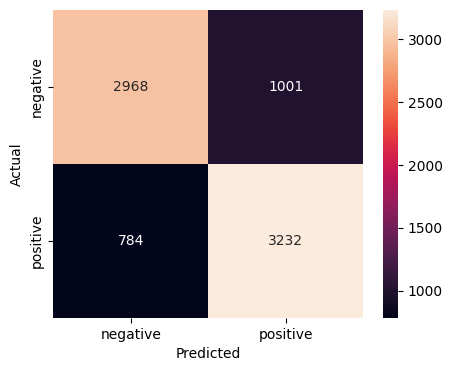

In [53]:
plot_confusion_matrix(y_train, y_pred_train)

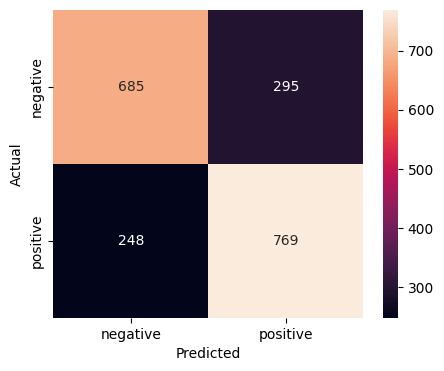

In [54]:
plot_confusion_matrix(y_test, y_pred_test)

**Accuracy**

In [55]:
train_accuracy_transformer_RF = accuracy_score(y_train,y_pred_train)
print("The accuracy on the training set is: ",train_accuracy_transformer_RF)
test_accuracy_transformer_RF = accuracy_score(y_test,y_pred_test)
print("The accuracy on the test set is: ",test_accuracy_transformer_RF)

The accuracy on the training set is:  0.7764558547276142
The accuracy on the test set is:  0.728092138207311


## **Sentiment Analysis with Neural Networks**

In [56]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Since labels are integers
    metrics=['accuracy']
)

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,731 (225.51 KB)

 Trainable params: 57,731 (225.51 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Fitting the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
    )

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6504 - loss: 0.6877 - val_accuracy: 0.7817 - val_loss: 0.4453
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6504 - loss: 0.6877 - val_accuracy: 0.7817 - val_loss: 0.4453
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4351 - val_accuracy: 0.7942 - val_loss: 0.4255
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4351 - val_accuracy: 0.7942 - val_loss: 0.4255
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8119 - loss: 0.4111 - val_accuracy: 0.8077 - val_loss: 0.4188
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8119 - loss: 0.4111 - val_accuracy: 0.8077 - val_loss: 0.4188
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8236 - loss: 0.3924 - val_accuracy: 0.8012 - val_loss: 0.4232
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8236 - loss: 0.3924 - val_accuracy: 0.

### **Checking Training and Test Performance**

In [58]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train)

# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


In [59]:
# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test)

# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step


**Confusion Matrix**

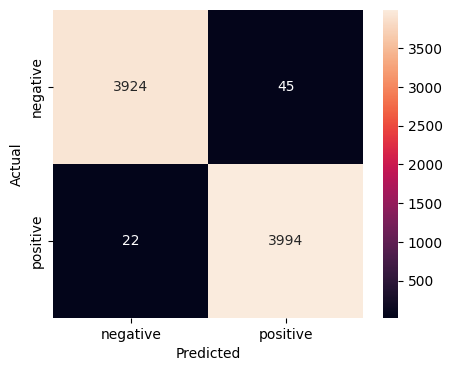

In [60]:
plot_confusion_matrix(y_train, y_train_preds)

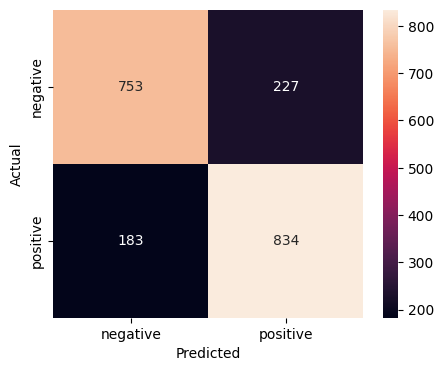

In [61]:
plot_confusion_matrix(y_test, y_test_preds)

**Accuracy**

In [62]:
train_accuracy_transformer_NN = accuracy_score(y_train,y_train_preds)
print("The accuracy on the training set is: ",train_accuracy_transformer_NN)
test_accuracy_transformer_NN = accuracy_score(y_test,y_test_preds)
print("The accuracy on the test set is: ",test_accuracy_transformer_NN)

The accuracy on the training set is:  0.9916092673763306
The accuracy on the test set is:  0.7946920380570857


# **Model Perfomance Comparison**

In [63]:
# Create a dictionary to compare different models and their accuracies
model_comp = {
    'Model': [
        'Word2Vec-RF',
        'Sentence-Transformer-RF',
        'Word2Vec-NN',
        'Sentence-Transformer-NN'
    ],
    'Train Accuracy': [
        train_accuracy_Word2Vec_RF,
        train_accuracy_transformer_RF,
        train_accuracy_Word2Vec_NN,
        train_accuracy_transformer_NN
    ],
    'Test Accuracy': [
        test_accuracy_Word2Vec_RF,
        test_accuracy_transformer_RF,
        test_accuracy_Word2Vec_NN,
        test_accuracy_transformer_NN
    ]
}

# Creating the DataFrame
model_comp_df = pd.DataFrame(model_comp)

model_comp_df

,Model,Train Accuracy,Test Accuracy
0,Word2Vec-RF,0.674640,0.660991
1,Sentence-Transformer-RF,0.776456,0.728092
2,Word2Vec-NN,0.749781,0.729594
3,Sentence-Transformer-NN,0.991609,0.794692


## **Evaluation Metrics for Sentiment Analysis: Focus on Negative Review Detection**

### **Business Problem Context**
In product sentiment analysis, the objective is to capture as many negative reviews as possible to ensure potential product issues are rarely missed. This is a **high-recall scenario** for the negative class.

### **Key Evaluation Metrics Explained**

#### **1. Recall (Sensitivity) - Most Important for This Use Case**
**Formula**: `Recall = True Positives / (True Positives + False Negatives)`

**For Negative Reviews**: How many actual negative reviews did we correctly identify?
- **High Recall**: We catch most negative reviews (good for identifying issues)
- **Low Recall**: We miss many negative reviews (bad - issues go undetected)

#### **2. Precision**
**Formula**: `Precision = True Positives / (True Positives + False Positives)`

**For Negative Reviews**: Of all reviews we predicted as negative, how many were actually negative?
- **High Precision**: Few false alarms
- **Low Precision**: Many false alarms (neutral/positive reviews misclassified as negative)

#### **3. F1-Score**
**Formula**: `F1 = 2 × (Precision × Recall) / (Precision + Recall)`

**Harmonic mean** of precision and recall - balances both metrics.

#### **4. Accuracy**
**Formula**: `Accuracy = Correct Predictions / Total Predictions`

**Overall correctness** - but can be misleading in imbalanced datasets.

### **Why Recall is Most Important for This Business Case**

**Business Impact Analysis:**

| Metric Priority | Business Impact | Risk Assessment |
|----------------|-----------------|-----------------|
| **High Recall** | ✅ Catch most product issues | Low risk of missing problems |
| High Precision | ✅ Fewer false alarms | Higher efficiency |
| High Accuracy | ✅ Overall correctness | General performance |

**Trade-off Consideration:**
- **High Recall + Low Precision**: We catch all real issues but investigate some false alarms
- **Low Recall + High Precision**: We miss real issues but what we flag is usually correct

**For product quality**, missing a real issue (Low Recall) is much worse than investigating a false alarm (Low Precision).

### **Answer: RECALL should be prioritized**

**Justification:**
1. **Business Risk**: Missing negative reviews means missing potential product issues
2. **Cost of Errors**: False negatives (missed issues) cost more than false positives (false alarms)
3. **Customer Impact**: Undetected issues can lead to customer dissatisfaction and brand damage
4. **Actionability**: Better to investigate extra reviews than miss critical feedback

In [65]:
# Practical demonstration of evaluation metrics for negative review detection
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
import numpy as np

# Simulated example: True vs Predicted labels for 3-class sentiment
# -1: Negative, 0: Neutral, 1: Positive
np.random.seed(42)

# Simulate true labels (more realistic distribution)
true_labels = np.array([-1, -1, -1, -1, -1, 0, 0, 0, 1, 1, 1, 1, 1, 1, -1, -1, 0, 1, -1, 0])

# Simulate two different model predictions
# Model A: High Recall for negative class (catches most negatives but some false positives)
pred_model_A = np.array([-1, -1, -1, -1, -1, -1, -1, 0, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1])

# Model B: High Precision for negative class (conservative, misses some negatives)
pred_model_B = np.array([0, -1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, -1, 0, 0, 1, 0, 0])

print("=" * 80)
print("BUSINESS CASE: CAPTURING NEGATIVE REVIEWS (-1)")
print("=" * 80)

# Calculate metrics for negative class specifically
def calculate_negative_metrics(true_labels, predictions):
    # Convert to binary: negative vs non-negative
    true_binary = (true_labels == -1).astype(int)
    pred_binary = (predictions == -1).astype(int)
    
    recall = recall_score(true_binary, pred_binary)
    precision = precision_score(true_binary, pred_binary)
    f1 = f1_score(true_binary, pred_binary)
    
    return recall, precision, f1

# Analyze both models
recall_A, precision_A, f1_A = calculate_negative_metrics(true_labels, pred_model_A)
recall_B, precision_B, f1_B = calculate_negative_metrics(true_labels, pred_model_B)

print(f"True negative reviews in dataset: {sum(true_labels == -1)} out of {len(true_labels)}")
print("\n" + "="*50)
print("MODEL A (High Recall Strategy)")
print("="*50)
print(f"Recall (Negative):    {recall_A:.3f} ({recall_A*100:.1f}%)")
print(f"Precision (Negative): {precision_A:.3f} ({precision_A*100:.1f}%)")
print(f"F1-Score (Negative):  {f1_A:.3f}")

print("\n" + "="*50)
print("MODEL B (High Precision Strategy)")
print("="*50)
print(f"Recall (Negative):    {recall_B:.3f} ({recall_B*100:.1f}%)")
print(f"Precision (Negative): {precision_B:.3f} ({precision_B*100:.1f}%)")
print(f"F1-Score (Negative):  {f1_B:.3f}")

# Business impact analysis
print("\n" + "="*80)
print("BUSINESS IMPACT ANALYSIS")
print("="*80)

total_negatives = sum(true_labels == -1)
missed_A = total_negatives - sum((true_labels == -1) & (pred_model_A == -1))
missed_B = total_negatives - sum((true_labels == -1) & (pred_model_B == -1))

false_alarms_A = sum((true_labels != -1) & (pred_model_A == -1))
false_alarms_B = sum((true_labels != -1) & (pred_model_B == -1))

print(f"Model A: Missed {missed_A} negative reviews, {false_alarms_A} false alarms")
print(f"Model B: Missed {missed_B} negative reviews, {false_alarms_B} false alarms")

print(f"\n💡 RECOMMENDATION: Choose Model A")
print(f"   - Better recall means fewer missed product issues")
print(f"   - Cost of investigating {false_alarms_A} false alarms < Cost of missing {missed_B - missed_A} real issues")

# Show which specific reviews were missed
print(f"\n🔍 DETAILED ANALYSIS:")
print(f"Model A missed negative reviews at positions: {np.where((true_labels == -1) & (pred_model_A != -1))[0]}")
print(f"Model B missed negative reviews at positions: {np.where((true_labels == -1) & (pred_model_B != -1))[0]}")

BUSINESS CASE: CAPTURING NEGATIVE REVIEWS (-1)
True negative reviews in dataset: 8 out of 20

MODEL A (High Recall Strategy)
Recall (Negative):    1.000 (100.0%)
Precision (Negative): 0.667 (66.7%)
F1-Score (Negative):  0.800

MODEL B (High Precision Strategy)
Recall (Negative):    0.500 (50.0%)
Precision (Negative): 1.000 (100.0%)
F1-Score (Negative):  0.667

BUSINESS IMPACT ANALYSIS
Model A: Missed 0 negative reviews, 4 false alarms
Model B: Missed 4 negative reviews, 0 false alarms

💡 RECOMMENDATION: Choose Model A
   - Better recall means fewer missed product issues
   - Cost of investigating 4 false alarms < Cost of missing 4 real issues

🔍 DETAILED ANALYSIS:
Model A missed negative reviews at positions: []
Model B missed negative reviews at positions: [ 0  4 15 18]


**Important Note**
<br>
- Numbers can vary due to the random elements in model training and the complex nature of the techniques used.
-This includes differences in how data is processed and slight variations each time the model runs, leading to changes in performance results.

<font size=5>Observations</font>



1. **Word2Vec with Random Forest (Word2Vec-RF):**

   * The model displays a significant low in training and testing accuracy, highlighting a case of underfitting. The model is not effectively learning from the training data and struggles to learn patterns from the unseen data as well. That indicates, Word2Vec's simplistic word averaging approach might not capture the intricate sentiment nuances effectively in longer texts when used with Random Forests.

2. **Sentence Transformer with Random Forest (Sentence-Transformer-RF):**

   * This model shows an improvement, compared to the Word2Vec-RF model. Sentence Transformers, designed to capture sentence-level semantic meaning, manage to generalize better to the test set, reducing the underfitting problem seen with Word2Vec-RF.

3. **Word2Vec with Neural Network (Word2Vec-NN):**

   * The train accuracy and test accuracy has improved, indicating less underfitting than Word2Vec-RF. Neural networks add some modeling flexibility compared to Random Forest, but the lack of contextual understanding limits its effectiveness.

4. **Sentence Transformer with Neural Network (Sentence-Transformer-NN):**

   * The disparity between the train and test accuracies indicates potential overfitting. Even with advanced methods, overfitting can happen if the model is too complex for the amount of data available.

# **Conclusion**

- We created embeddings for the text data using the following methods:
    - Word2Vec
    - Sentence transformer

- We then built ML and DL models using the different datasets obtained from the different embedding techniques.
- We compared the performances of all the models we built.

<font size=5 color='blue'>Power Ahead!</font>
___